In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/data_new.csv")  # Replace with actual path or file

# Display first few rows
df.head()


,Unnamed: 0,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Vehicle_ID,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C]
0,0,2017-07-05 19:17:19.418,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,1,2017-07-05 19:17:19.508,33.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2,2017-07-05 19:17:19.598,33.0,97.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,3,2017-07-05 19:17:19.688,33.0,97.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,4,2017-07-05 19:17:19.779,33.0,97.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [2]:
# Basic structure
df.info()
# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Feature Engineering from 'Time'
df['Hour'] = df['Time'].dt.hour
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month
df['SecondsSinceStart'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
# Check null values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("🔍 Missing Values:\n", missing)

# Percentage missing
(missing / len(df) * 100).sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693824 entries, 0 to 2693823
Data columns (total 16 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Unnamed: 0                                 int64  
 1   Time                                       object 
 2   Engine Coolant Temperature [Â°C]           float64
 3   Intake Manifold Absolute Pressure [kPa]    float64
 4   Engine RPM [RPM]                           float64
 5   Vehicle Speed Sensor [km/h]                float64
 6   Intake Air Temperature [Â°C]               float64
 7   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 8   Absolute Throttle Position [%]             float64
 9   Ambient Air Temperature [Â°C]              float64
 10  Accelerator Pedal Position D [%]           float64
 11  Accelerator Pedal Position E [%]           float64
 12  Vehicle_ID                                 int64  
 13  Engine Coolant Temperature [°C]           

,0
Ambient Air Temperature [Â°C],53.146494
Intake Air Temperature [Â°C],53.142150
Engine Coolant Temperature [Â°C],53.136359
Ambient Air Temperature [°C],46.874443
Intake Air Temperature [°C],46.869766
Engine Coolant Temperature [°C],46.863901
Accelerator Pedal Position E [%],0.026913
Accelerator Pedal Position D [%],0.024278
Absolute Throttle Position [%],0.017930
Air Flow Rate from Mass Flow Sensor [g/s],0.014923


In [3]:
# Remove strange characters from column names
df.columns = df.columns.str.replace(r"[^\w\s]", "", regex=True).str.strip()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Recheck columns
df.columns


Index(['Unnamed 0', 'Time', 'Engine Coolant Temperature ÂC',
       'Intake Manifold Absolute Pressure kPa', 'Engine RPM RPM',
       'Vehicle Speed Sensor kmh', 'Intake Air Temperature ÂC',
       'Air Flow Rate from Mass Flow Sensor gs', 'Absolute Throttle Position',
       'Ambient Air Temperature ÂC', 'Accelerator Pedal Position D',
       'Accelerator Pedal Position E', 'Vehicle_ID',
       'Engine Coolant Temperature C', 'Intake Air Temperature C',
       'Ambient Air Temperature C', 'Hour', 'DayOfWeek', 'Month',
       'SecondsSinceStart'],
      dtype='object')

In [4]:
# Basic structure
df.info()

# Check null values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("🔍 Missing Values:\n", missing)

# Percentage missing
(missing / len(df) * 100).sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693824 entries, 0 to 2693823
Data columns (total 20 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   Unnamed 0                               int64         
 1   Time                                    datetime64[ns]
 2   Engine Coolant Temperature ÂC           float64       
 3   Intake Manifold Absolute Pressure kPa   float64       
 4   Engine RPM RPM                          float64       
 5   Vehicle Speed Sensor kmh                float64       
 6   Intake Air Temperature ÂC               float64       
 7   Air Flow Rate from Mass Flow Sensor gs  float64       
 8   Absolute Throttle Position              float64       
 9   Ambient Air Temperature ÂC              float64       
 10  Accelerator Pedal Position D            float64       
 11  Accelerator Pedal Position E            float64       
 12  Vehicle_ID                              in

,0
Ambient Air Temperature ÂC,53.146494
Intake Air Temperature ÂC,53.142150
Engine Coolant Temperature ÂC,53.136359
Ambient Air Temperature C,46.874443
Intake Air Temperature C,46.869766
Engine Coolant Temperature C,46.863901
Accelerator Pedal Position E,0.026913
Accelerator Pedal Position D,0.024278
Absolute Throttle Position,0.017930
Air Flow Rate from Mass Flow Sensor gs,0.014923


In [5]:
# Clean column names (remove special chars, preserve all)
df.columns = df.columns.str.replace(r"[^\w\s]", "", regex=True).str.strip()

# Show cleaned column names
print(df.columns.tolist())


['Unnamed 0', 'Time', 'Engine Coolant Temperature ÂC', 'Intake Manifold Absolute Pressure kPa', 'Engine RPM RPM', 'Vehicle Speed Sensor kmh', 'Intake Air Temperature ÂC', 'Air Flow Rate from Mass Flow Sensor gs', 'Absolute Throttle Position', 'Ambient Air Temperature ÂC', 'Accelerator Pedal Position D', 'Accelerator Pedal Position E', 'Vehicle_ID', 'Engine Coolant Temperature C', 'Intake Air Temperature C', 'Ambient Air Temperature C', 'Hour', 'DayOfWeek', 'Month', 'SecondsSinceStart']


In [6]:
# Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Sort by time and set 'Time' as index
df = df.sort_values('Time').set_index('Time')

# Interpolate missing values (no dropping)
df = df.interpolate(method='time', limit_direction='both')

# Final check
print("Remaining missing values:", df.isnull().sum().sum())




Remaining missing values: 0


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Randomly sample 10% of the data
sampled_df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

# 2. Define target and feature columns
target_cols = ['Air Flow Rate from Mass Flow Sensor gs']
feature_cols = [
    'Engine RPM RPM', 'Vehicle Speed Sensor kmh',
    'Accelerator Pedal Position D', 'Accelerator Pedal Position E',
    'Intake Manifold Absolute Pressure kPa', 'Intake Air Temperature C',
    'Engine Coolant Temperature C', 'Ambient Air Temperature C',
    'Hour', 'DayOfWeek', 'Month', 'SecondsSinceStart'
]
X = sampled_df[feature_cols]
y = sampled_df[target_cols]


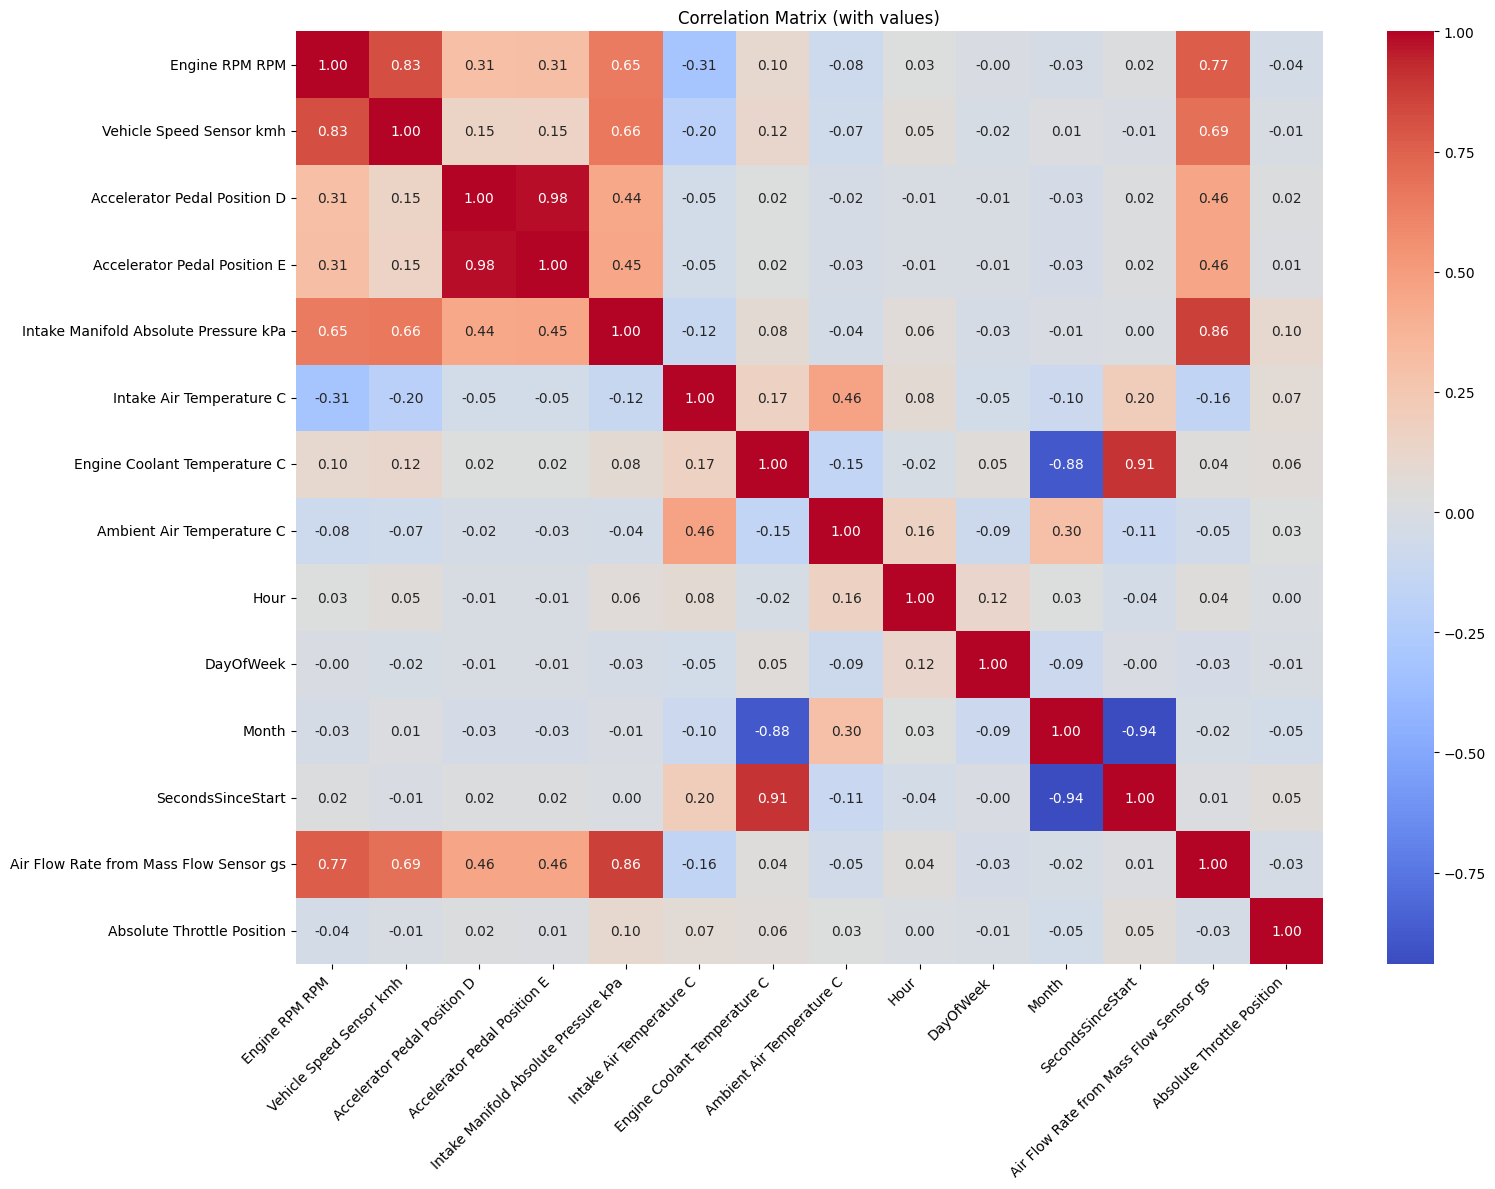

In [8]:

# 3. Correlation Matrix
plt.figure(figsize=(16, 12))
sns.heatmap(sampled_df[feature_cols + target_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (with values)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression # This line was added to import the LinearRegression class.
features = ['Intake Manifold Absolute Pressure kPa', 'Engine RPM RPM', 'Vehicle Speed Sensor kmh','Month',"SecondsSinceStart"]
target = 'Air Flow Rate from Mass Flow Sensor gs'

# --- Sample the dataset to 10% ---
df_sampled = df.sample(frac=0.1, random_state=42)

X = df_sampled[features]
y = df_sampled[target]

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Model 2: Random Forest ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Model 3: XGBoost ---
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

# --- Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    # Calculate RMSE without the 'squared' argument
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Removed squared=False
    print(f"  RMSE: {rmse:.4f}")
    print()

# --- Evaluate all models ---
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Linear Regression Performance:
  R² Score: 0.8221
  RMSE: 6.8729

Random Forest Performance:
  R² Score: 0.9347
  RMSE: 4.1638

XGBoost Performance:
  R² Score: 0.9183
  RMSE: 4.6576



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression # This line was added to import the LinearRegression class.
features = ['Engine RPM RPM', 'Vehicle Speed Sensor kmh','Month',"Hour"]
target = 'Air Flow Rate from Mass Flow Sensor gs'

# --- Sample the dataset to 10% ---
df_sampled = df.sample(frac=0.1, random_state=42)

X = df_sampled[features]
y = df_sampled[target]

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Model 2: Random Forest ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Model 3: XGBoost ---
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    # Calculate RMSE without the 'squared' argument
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Removed squared=False
    print(f"  RMSE: {rmse:.4f}")
    print()

# --- Evaluate all models ---
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

Linear Regression Performance:
  R² Score: 0.6011
  RMSE: 10.2907

Random Forest Performance:
  R² Score: 0.7402
  RMSE: 8.3055

XGBoost Performance:
  R² Score: 0.7128
  RMSE: 8.7323

